Get and Load the data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow
print("GPU Available:", tensorflow.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permission

!kaggle datasets download -d imbikramsaha/hindi-mnist

!unzip hindi-mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: Hindi-MNIST/train/7/10299.png  
  inflating: Hindi-MNIST/train/7/10300.png  
  inflating: Hindi-MNIST/train/7/10301.png  
  inflating: Hindi-MNIST/train/7/10302.png  
  inflating: Hindi-MNIST/train/7/10303.png  
  inflating: Hindi-MNIST/train/7/10304.png  
  inflating: Hindi-MNIST/train/7/10306.png  
  inflating: Hindi-MNIST/train/7/10307.png  
  inflating: Hindi-MNIST/train/7/104017.png  
  inflating: Hindi-MNIST/train/7/104018.png  
  inflating: Hindi-MNIST/train/7/104019.png  
  inflating: Hindi-MNIST/train/7/104021.png  
  inflating: Hindi-MNIST/train/7/104023.png  
  inflating: Hindi-MNIST/train/7/104024.png  
  inflating: Hindi-MNIST/train/7/104025.png  
  inflating: Hindi-MNIST/train/7/104026.png  
  inflating: Hindi-MNIST/train/7/104027.png  
  inflating: Hindi-MNIST/train/7/104028.png  
  inflating: Hindi-MNIST/train/7/104029.png  
  inflating: Hindi-MNIST/train/7/104030.png  
  inflating: Hindi-MNIST/train/7/1040

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               fill_mode='nearest'
                              )
image_gen.flow_from_directory('Hindi-MNIST/train')
image_gen.flow_from_directory('Hindi-MNIST/test')

Found 17000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


Build and train the model

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, SpatialDropout2D

In [ ]:
model=keras.Sequential()

model.add(Conv2D(32,3,strides=(1,1),padding='same',activation='relu',input_shape=(32, 32, 1)))
model.add(SpatialDropout2D(0.3))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))

model.add(Conv2D(64,3,strides=(2,2),padding='same',activation='relu'))
model.add(SpatialDropout2D(0.3))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))

model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d (SpatialDropout2D) │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_1                  │ (None, 16, 16, 64)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         144,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,936 (636.47 KB)

 Trainable params: 162,936 (636.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
batch_size = 16
image_shape=(32,32,1)
train_image_gen = image_gen.flow_from_directory('Hindi-MNIST/train',
                                               target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')


Found 17000 images belonging to 10 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory('Hindi-MNIST/test',
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 3000 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2, monitor='val_loss')

history = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stopping]
                              )

Epoch 1/20
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7401 - loss: 0.7386 - val_accuracy: 0.9420 - val_loss: 0.2877
Epoch 2/20
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7482 - loss: 0.7255 - val_accuracy: 0.9483 - val_loss: 0.2783
Epoch 3/20
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7580 - loss: 0.7052 - val_accuracy: 0.9523 - val_loss: 0.2695
Epoch 4/20
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7550 - loss: 0.7119 - val_accuracy: 0.9607 - val_loss: 0.2476
Epoch 5/20
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7750 - loss: 0.6995 - val_accuracy: 0.9563 - val_loss: 0.2737
Epoch 6/20
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7801 - loss: 0.6814 - val_accuracy: 0.9557 - val_loss: 0.2540


In [ ]:
from sklearn.metrics import accuracy_score
y_prob=model.predict(test_image_gen)
y_pred=np.argmax(y_prob,axis=1)
accuracy=accuracy_score(test_image_gen.classes,y_pred)
print('Accuracy:',accuracy)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Accuracy: 0.9626666666666667


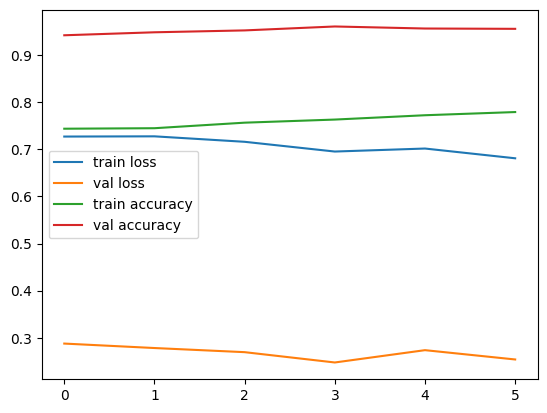

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


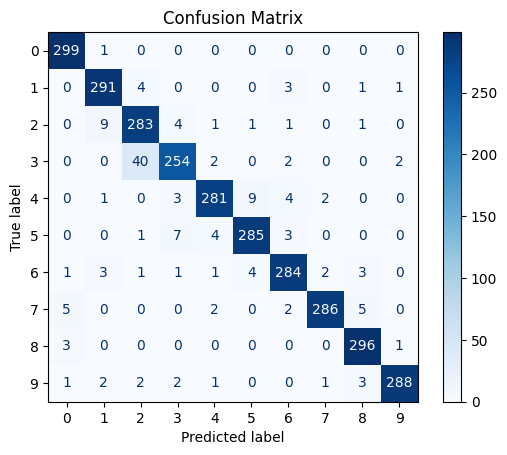

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_prob = model.predict(test_image_gen)
y_pred = np.argmax(y_prob, axis=1)

cm = confusion_matrix(test_image_gen.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_image_gen.classes))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Svae and deploy the model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Hindi MNIST/CNN_epoch_25.keras')

Conclusion:- 70% --> 96% accuracy reached with Dropout layers & Image augmentation